# Kapittel 6 - Produksjonsteori

Notatblokken lastes enklest ned på [https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Produksjonsteori%20-%20Kapittel%206.ipynb](https://github.com/uit-sok-1303-v26/uit-sok-1303.v26.github.io/blob/main/Produksjonsteori%20-%20Kapittel%206.ipynb)


## 1. Kostnader på kort sikt

Vi skal skrive kostnadsfunksjonen på kort sikt som en funksjon av produksjonsmengden $Q$. På kort sikt antar vi at kapitalen er fast på et nivå $K_0$.       

 
Vi får da følgende produktfunksjon:

$$
Q = Q(K,L)=L^{0.5}K_0^{0.5}\tag{1}
$$


På kort sikt har bedriften tilgang til begrenset kapital $K_0$
Prisen per enhet kapital er fast $r$, mens én time med arbeidskraft koster $w$. 

På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. I tillegg antar vi at bedriften har kostnader til som vi kaller $(Z)$. Se matteboks 6.1 


In [68]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import pandas as pd

In [69]:
L, K, Q, Z, K_0, w, r, z = sp.symbols('L K Q Z K_0 w r z', real=True, positive=True)

In [70]:
kvantum_eq = sp.Eq(Q, (K_0**sp.Rational(1,2))*(L**sp.Rational(1,2)))
kvantum_eq

Eq(Q, sqrt(K_0)*sqrt(L))

Dette kan omformuleres som arbeidsbehovet ved å løse ligning (1) for $L$

$$
Q = L^{0.5} K_0^{0.5} \implies Q^2 = L \cdot K_0 \implies L = \frac{Q^2}{K_0} \tag{2}
$$

 

In [71]:
L_losning = sp.solve(kvantum_eq, L)[0]
L_losning

Q**2/K_0

### Kostnadsfunksjonen på kort sikt

På kort sikt har bedriften tre typer kostnader:

**Faste kostnader (FC)**: $r \cdot K_0$ kostnaden for kapital som er bundet uavhengig av produksjonsnivå

**Variable kostnader (VC)**: $w \cdot L + z \cdot Q$ lønnskostnader og andre variable kostnader som varierer med produksjon

**Totale kostnader (TC)**: $FC + VC$

Den totale kostnaden på kort sikt er:


$$
TC = \underbrace{w\cdot L}_{\text{lønnskostnader}} + \underbrace{z \cdot Q}_{\text{andre variable kostnader}}  + \underbrace{r \cdot K_0}_{\text{kapitalkostnader}}
$$



Ved å substituere inn uttrykket for $L$ fra ligning (2) får vi kostnadene som en funksjon av $Q$ alene:

$$
TC(Q) = \frac{wQ^2}{K_0} + zQ +rK_0
$$


In [72]:
FC_eq_kort = r*K_0 #Faste kostnader kort sikt
VC_eq_kort = w*L_losning + z*Q #Variable kostnader kort sikt
TC_eq_kort = VC_eq_kort+FC_eq_kort #Totale kostnader kort sikt
display(TC_eq_kort)



K_0*r + Q*z + Q**2*w/K_0

### Marginalkostnaden på kort sikt

Marginalkostnaden finner vi ved å derivere totalkostnaden med hensyn på $Q$. Den viser hvor mye kostnadene øker når produksjonen øker med en enhet

$$
MC = \frac{\partial TC}{\partial Q} = \frac{2wQ}{K_0} + z \tag{5}
$$

Vi ser at marginalkostnaden er lineær og stigende i $Q$. Jo mer vi produserer, desto dyrere blir den neste enheten. Siden hver ny arbeider bidrar med mindre produksjon, koster det mer per enhet ekstra produksjon.

In [73]:
MC_eq_kort = sp.diff(TC_eq_kort, Q) #Marginalkostnad 
display(MC_eq_kort)


z + 2*Q*w/K_0

### Gjennomsnittlige variable kostnader (AVC)

De gjennomsnittlige variable kostnadene er variable kostnader per produsert enhet:

$$
AVC = \frac{VC}{Q} = \frac{\frac{wQ^2}{K_0 + zQ}}{Q} = \frac{wQ}{K_0} + z \tag{6}
$$

$MC = 2 \cdot \frac{wQ}{K_0} + z$ mens $AVC = \frac{wQ}{K_0} + z$. Marginalkostnaden stiger altså dobbelt så raskt som gjennomsnittlige variable kostnader.

In [74]:
AVC_eq_kort = VC_eq_kort/Q
display(sp.simplify(AVC_eq_kort))


z + Q*w/K_0

### Gjennomsnittlige faste kostnader (AFC)

De gjennomsnittlige faste kostnadene per enhet er

$$
AFC = \frac{FC}{Q} = \frac{rK_0}{Q} \tag{7}
$$

AFC synker asymptotisk mot null når $Q$ øker. De faste kostnadene spres på flere enheter når produksjonen øker.

In [75]:
AFC_eq_kort = FC_eq_kort/Q
display(AFC_eq_kort)


K_0*r/Q

### Gjennomsnittlige totale kostnader (ATC)

De gjennomsnittlige totale kostnadene per enhet er summen av AVC og AFC

$$
ATC = AVC + AFC = \frac{wQ}{K_0} + z + \frac{rK_0}{Q} \tag{8}
$$


I bunnpunktet av ATC-kurven er $MC = ATC$. Dette kan vi finne ved å derivere ATC med hensyn på $Q$ og sette uttrykket lik null.

In [76]:
ATC_eq_kort = AVC_eq_kort+AFC_eq_kort
display(sp.simplify(ATC_eq_kort))

K_0*r/Q + z + Q*w/K_0

### Minimumspunktet til ATC

Minimumspunktet til ATC finner vi ved å derivere med hensyn på $Q$ og sette lik null. I dette punktet vil $ATC = MC$.

$$
\frac{\partial ATC}{\partial Q} = \frac{w}{K_0} - \frac{rK_0}{Q^2} = 0
$$

$$
Q^* = K_0 \sqrt{\frac{r}{w}} \tag{9}
$$

Minimumspunktet til ATC kan vi finne ved å derivere med hensyn på Q og satt lik 0. I dette punktet vil ATC=MC

In [77]:
Minimum_ATC_kort = sp.solve(sp.diff(ATC_eq_kort, Q), Q)[0]
display(Minimum_ATC_kort)

K_0*sqrt(r)/sqrt(w)

In [78]:
MC_i_min = MC_eq_kort.subs(Q, Minimum_ATC_kort)
ATC_i_min = ATC_eq_kort.subs(Q, Minimum_ATC_kort)
display(sp.simplify(MC_i_min))
display(sp.simplify(ATC_i_min))

2*sqrt(r)*sqrt(w) + z

2*sqrt(r)*sqrt(w) + z

Vi lager en illustrasjonsfigur. Vi bruker "Lambdify" for å omgjøre sympy ligninger om til plottbare funksjoner

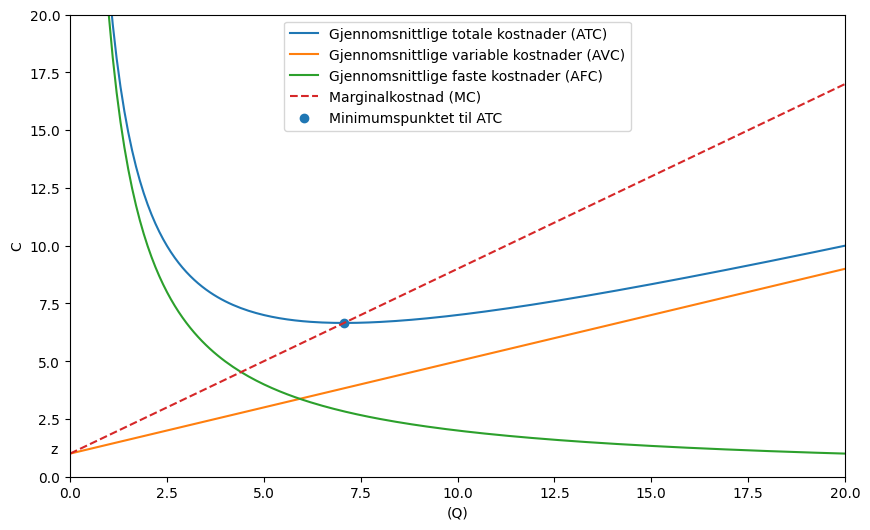

In [79]:

r_val = 4
w_val = 2
z_val = 1
K_0_val = 5

ATC_kort_func = sp.lambdify(Q, ATC_eq_kort.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}))
AVC_kort_func = sp.lambdify(Q, AVC_eq_kort.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}))
AFC_kort_func = sp.lambdify(Q, AFC_eq_kort.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}))
MC_kort_func = sp.lambdify(Q, MC_eq_kort.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}))


fig, ax = plt.subplots(figsize=(10, 6))
Q_values = np.linspace(0.001, 100, 1000)


ax.plot(Q_values, ATC_kort_func(Q_values), label='Gjennomsnittlige totale kostnader (ATC)')
ax.plot(Q_values,AVC_kort_func(Q_values), label='Gjennomsnittlige variable kostnader (AVC)')
ax.plot(Q_values, AFC_kort_func(Q_values), label='Gjennomsnittlige faste kostnader (AFC)')
ax.plot(Q_values, MC_kort_func(Q_values), label='Marginalkostnad (MC)', linestyle='--')


MC_ATC_intersection = sp.solve(sp.Eq(MC_eq_kort, ATC_eq_kort), Q)[0]
MC_ATC_intersection_cost = ATC_eq_kort.subs(Q, MC_ATC_intersection)

ax.scatter(MC_ATC_intersection.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}), MC_ATC_intersection_cost.subs({r: r_val, w: w_val, z: z_val, K_0: K_0_val}), label = "Minimumspunktet til ATC")



ax.set_xlabel('(Q)')
ax.set_ylabel('C')
ax.annotate('z', annotation_clip=False, xy=(-0.5, z_val), xytext=(-0.5, z_val))

ax.set_xlim(0, 20)
ax.set_ylim(0,20)

ax.legend();


## Seminaroppgave 1 "6.2: På besøk hos Alpha Tech"

Du har fått jobb i et konsulentselskap, og ditt første oppdrag er et besøk til oppstartsbedriften Alpha Tech. De har ennå ikke begynt å ansette folk og lurer på hva arbeidsbehovet vil være for ulike produksjonsnivåer, hvor mye hver ny ansatt vil klare å produsere, og hva en slik ekspansjon vil koste.

De ønsker å handle raskt, slik at perspektivet er kortsiktig, hvor vi kan anta at den installerte kapitalen ligger fast. Produktfunksjonen deres er

$$
Q = K^{0.5}L^{0.5}
$$

og den installerte kapitalen er $K_O = 1$.

### a) Hva er arbeidsbehovet i produksjonen og grenseproduktet til arbeidskraften i bedriften? Regn ut og illustrer.

In [80]:
L,K,z,w,r,Q,C = sp.symbols('L K z w r Q C')

# Definerer balansert cobb-douglas-funksjon
cobb_doug = sp.Eq(Q, K**0.5 * L**0.5)

cobb_doug

Eq(Q, K**0.5*L**0.5)

In [81]:
# Løser for L
L_løsning = sp.solve(cobb_doug, L)[0]

L_løsning

Q**2/K

In [82]:
# Definerer en funksjon av L for å plotte
def L_plot(Q,K):
    return Q**2/K

L_plot(Q,K)

Q**2/K

In [83]:
# Isokost
isokost = sp.Eq(C, w*L + r*K)

isokost

Eq(C, K*r + L*w)

In [84]:
# Figurkonfigurasjon
def create_ax():
    fig, ax = plt.subplots()
    ax.set_xlabel('Q', loc = "right")
    ax.set_ylabel('L', rotation=0, loc ='top')
    ax.set_ylim(0, 4.5)
    ax.set_xlim(0, 4.5)
    ax.set_xticks(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, 5, 1))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    return fig, ax
    

In [85]:
# Substituerer verdier inn for L_løsning

L_subs = L_løsning.subs([(K, 1), (Q, 1)])

L_subs

1

In [86]:
# Substituerer verdier inn for Q = 1

Q_subs = cobb_doug.rhs.subs([(K,1), (L,L_subs)])

Q_subs

1

In [87]:
# Hvis produksjonen øker til Q = 2
L_subs_2 = L_løsning.subs([(K, 1), (Q, 2)])

L_subs_2

4

In [88]:
# Substituerer verdier inn for Q hvis produksjonen øker

Q_subs_2 = cobb_doug.rhs.subs([(K,1), (L,L_subs_2)])

Q_subs_2

2.00000000000000

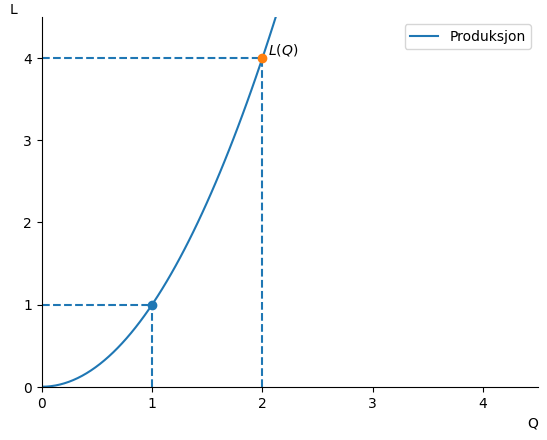

In [89]:
# Illustrerer i en figur
Q_verdier = np.linspace(0.001, 4, 100)

fig, ax = create_ax()

# Tegner produksjonsnivå for K_0 = 1
ax.plot(Q_verdier, L_plot(Q_verdier,1), label = "Produksjon")

# Tegner optimale punkt for produksjon hvor K = 1, Q = 1
ax.scatter(Q_subs,L_subs, zorder = 5)
ax.vlines(Q_subs,0,L_subs, linestyles = "--")
ax.hlines(L_subs,0,Q_subs, linestyles = "--")

# Tegner optimale punkt for produksjon hvor K= 1, Q= 2
ax.scatter(Q_subs_2, L_subs_2, zorder = 5)
ax.vlines(Q_subs_2,0,L_subs_2, linestyles = "--")
ax.hlines(L_subs_2, 0, Q_subs_2, linestyles = "--")

# Skriver inn L(Q)
ax.annotate('$L(Q)$',(Q_subs_2+0.05,L_subs_2+0.05))


ax.legend();

### b) Anta at prisen på innsatsfaktorene arbeidskraft og kapital er henholdsvis $w = r = 1$, og at bruken av vareinnsats er så liten at vi kan se bort ifra den $z = 0$. 

Regn ut grensekostnaden og den totale gjennomsnitskostnaden i produksjonen og illustrer.

In [ ]:
# Fra matteboks 6.1 er de totale kostnadene definert som
C = w*Q**2/K + z*Q+ r*K

C

K*r + Q*z + Q**2*w/K

In [ ]:
# Finner grensekostnaden ved å derivere C med hensyn på Q
MC = sp.diff(C, Q)

MC

z + 2*Q*w/K

In [ ]:
# Definerer grensekostnaden som en funksjon for å plotte
def MC_plot(Q,K,w,z):
    return z + 2*w*Q/K

MC_plot(Q,K,w,z)

z + 2*Q*w/K

In [ ]:
# Fra matteboks 6.1, gjennomsnittlige variable kostnader
AVC = w*Q/K + z

AVC

z + Q*w/K

In [ ]:
# Fra matteboks 6.1, gjennomsnittlige faste kostnader
AFC = r*K/Q

AFC

K*r/Q

In [ ]:
# Fra matteboks 6.1, gjennomsnittlige totale kostnader
ATC = AVC + AFC

ATC

K*r/Q + z + Q*w/K

In [ ]:
# Definerer ATC som en funksjon for å plotte
def ATC_plot(Q,K,w,z,r):
    return K*r/Q + w*Q/K + z

ATC_plot(Q,K,w,z,r)

K*r/Q + z + Q*w/K

In [ ]:
# Substituerer inn for K = 1 og Q = 1, r = 1
AFC_subs = AFC.subs([(K,1), (Q,1), (r,1)])

AFC_subs

1

In [ ]:
# Substituerer inn for K = 1 og Q = 1, w = 1, z = 0
MC_subs = MC.subs([(K,1), (Q,1), (w,1), (z,0)])
MC_subs

2

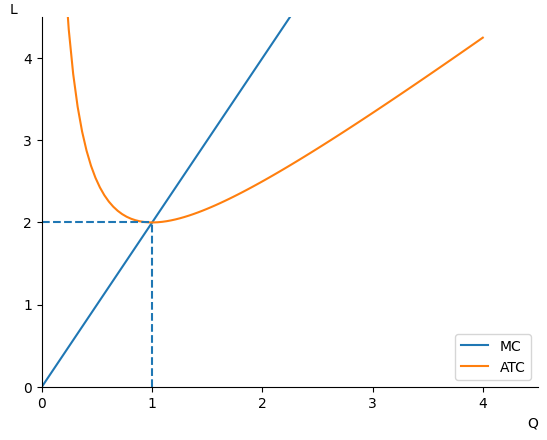

In [ ]:
fig2, ax2 = create_ax()

# Tegner ATC og MC
ax2.plot(Q_verdier, MC_plot(Q_verdier,1,1,0), label = "MC")
ax2.plot(Q_verdier, ATC_plot(Q_verdier,1,1,0,1), label = "ATC")

# Tegner linjer for MC og AFC
ax2.vlines(AFC_subs,0,MC_subs, linestyles = "--")
ax2.hlines(MC_subs,0,AFC_subs, linestyles = "--")

ax2.legend();


### c) Forklar for ledelsen ved Alpha Tech forskjellene du finner i arbeidsbehov og kostnader som du ser nå, opp mot det du fant ved ditt første besøk.

Vi ser at grensekostnaden stiger i produsert kvantum. Den siste enheten produsert koster mer enn den forrige. Dette skyldes at arbeidsbehovet øker eksponensielt med produksjonen, eller sagt på en annen måte, grenseproduktet til arbeidskraften faller.

De gjennomsnittlige totale kostnadene har en U-form. For lavt kvantum produsert faller ATC i mengde produsert, og det skyldes at de faste kostnadene deles på flere enheter. For høyere mengde produsert øker ATC i mengde produsert, og dette drives av de økte arbeidskostnadene.

De to kostnadskurvene krysser for $Q = 1$, hvor  $MC = ATC = 2$. I dette punktet koster dermed den siste produserte enheten like mye som  gjennomsnittet av alle de produserte enhetene. Dette representerer også bunnpunktet til ATC-kurven. Til venstre for dette punktet, altså for $Q < 1$, er $MC < ATC$. Kostnadsøkningen ved å produsere en enhet til er her lavere enn gjennomsnittet, og dette trekker ATC-kurven nedover. Til høyre for dette punktet, altså for $Q > 1$, er $MC > ATC$. De økte kostnadene forbundet med å produsere en ekstra enhet er her høyere enn gjennomsnittet, og dettte trekker ATC-kurven oppover.

## 2. Skalautbytte

Vi er interessert i et mål for produksjonen når vi oppskalerer bruken av alle faktorer. Dette kalles skalautbytte. Dersom bedriften øker innsatsen av alle faktorer med 20% og den får en 20% økning i produksjon har bedriften en teknologi som viser *konstant* skalautbytte. Dersom produksjon øker med mer enn 20% viser teknologien *økende* skalautbytte; øker produksjon med mindre en den proporsjonale faktorøkningen har vi med en teknologi å gjøre med *avtakende* skalautbytte.       

La oss tenke oss følgende produktfunksjon som forvandler arbeidskraft og kapital til et ferdig produkt:

$$
Q=Q(K,L)
$$

En økning i bruken av begge faktorer kan kapres matematisk ved å gange innsatsen med et tall $t>1$. Da blir produksjonsmengden gitt ved $Q(tK,tL)$. Vi har

- Konstant skalautbytte dersom $Q(tK,tL)=tQ(K,L)$
- Økende skalautbytte dersom $Q(tK,tL)>tQ(K,L)$
- Avtakende skalautbytte dersom $Q(tK,tL)<tQ(K,L).$

Skalautbytte i Cobb-Douglas produktfunksjoner

En bedrift bruker følgende Cobb-Douglas produktfunksjon til å lage et gode


$$
Q = Q(K,L)=K^{0.5}L^{0.5}\;\;(1)
$$


hvor $Q$ er enheter ferdigprodukt, $L$ er enheter arbeidskraft (målt i timer), $K$ er enheter kapital. 

La oss undersøke skalaegenskapene til denne produktfunksjon.


Vi kan finne overskudd fra en fordobling av innsats i forhold til dobbel så mye produksjon

In [100]:
# # definer nye symboler
K, a, b = sp.symbols('K a b', positive=True, real=True)

# definer produktfn
def prod_cd(L,K,a,b):
    return L**a*K**b


# finn "overskudd" fra en fordobling av innsats i forhold til dobbel så mye produksjon
# NB begge innsatsfaktorene fordobles

overskudd_cd=prod_cd(2*L,2*K,a,b)-2*prod_cd(L,K,a,b)
sp.simplify(overskudd_cd)

K**b*L**a*(2**(a + b) - 2)

Dersom dette uttrykket er positivt har vi med økende skalautbytte å gjøre. Vi ser at det er delen i parentes som vi må analysere, og her blir $a+b$ viktig for fortegnet her. Dersom $a+b=1$ er `overskudd_cd` = 0; dersom $a+b>1$ er `overskudd_cd` > 0; dersom $a+b<1$ er `overskudd_cd` < 0. Da har vi utledet et generelt resultat for Cobb-Douglas produktfunksjoner som i (3):        

- $a+b<1$ betyr avtakende skalautbytte
- $a+b=1$ betyr konstant skalautbytte
- $a+b>1$ betyr økende skalautbytte.



## 3. Kostnader på lang sikt

På lang sikt kan bedriften fritt tilpasse alle innsatsfaktorer, inkludert kapital. Det betyr at det ikke lenger finnes faste kostnader, alle kostnader er variable.

Fra Kapittel 5 (matteboks 5.2) vet vi at den optimale faktorinnsatsen for en Cobb-Douglas produktfunksjon $Q = K^{1-a}L^a$ er gitt ved:

$$
L^* = Q \left(\frac{(1-a)r}{aw}\right)^{a}
$$

$$
K^* = Q \left(\frac{aw}{(1-a)r}\right)^{1-a}
$$
 
Vi får da følgende produktfunksjon:


\begin{equation}
    Q = Q(K,L)=L^{a}K^{1-a}\tag{2}
\end{equation}

In [101]:
# Fra matteboks 5.2 i kapittel 5 vet vi at optimal innsats av kapital er lik: og arbeidskraft

L_opt = Q*((1-a)*r/(a*w))**(a)
K_opt = Q*(a*w/((1-a)*r))**(1-a)

L_opt



Q*(r*(1 - a)/(a*w))**a

In [102]:
K_opt

Q*(a*w/(r*(1 - a)))**(1 - a)

## Total kostnadsfunksjon på lang sikt

Kostnadsfunksjonen på lang sikt inkluderer lønnskostnader, kapitalkostnader og vareinnsats:

$$
TC_{LS} = w \cdot L^* + r \cdot K^* + z \cdot Q
$$

Ved å substituere inn de optimale faktorinnsatsene får vi en kostnadsfunksjon som kun avhenger av $Q$ og prisene.

In [103]:
TC_eq_lang = w*L_opt + r*K_opt + z*Q
display(TC_eq_lang)

Q*r*(a*w/(r*(1 - a)))**(1 - a) + Q*w*(r*(1 - a)/(a*w))**a + Q*z

### Marginalkostnad på lang sikt ($MC_{LS}$)

Marginalkostnaden på lang sikt finner vi ved å derivere den totale kostnadsfunksjonen med hensyn på $Q$:

$$
MC_{LS} = \frac{\partial TC_L}{\partial Q}
$$

Denne viser hvor mye kostnadene øker når produksjonen øker med én enhet, gitt at bedriften optimalt tilpasser alle faktorinnsatser.

In [104]:
MC_eq_lang = sp.diff(TC_eq_lang, Q)
display(MC_eq_lang)

r*(a*w/(r*(1 - a)))**(1 - a) + w*(r*(1 - a)/(a*w))**a + z

### Gjennomsnittlige totale kostnader på lang sikt ($ATC_{LS}$)

De gjennomsnittlige totale kostnadene på lang sikt er:

$$
ATC_{LS} = \frac{TC_{LS}}{Q}
$$



In [105]:
ATC_eq_lang = TC_eq_lang/Q
display(ATC_eq_lang)

(Q*r*(a*w/(r*(1 - a)))**(1 - a) + Q*w*(r*(1 - a)/(a*w))**a + Q*z)/Q

Og for en balansert cobb douglas funksjon. 

In [106]:
display(ATC_eq_lang.subs({a: sp.Rational(1,2)}).simplify())

r*sqrt(w/r) + w*sqrt(r/w) + z

## Seminaroppgave 2 "6.3 På nytt besøk hos Alpha Tech"

Det har gått et år, og Alpha Tech ber deg komme tilbake for en ny diskusjon om kostnadsfunksjoner. I mellomtiden har de investert i mer produksjonskapital, den er doblet slik at $K_O = 2$. 

De stiller samme spørsmålene som ved ditt første besøk, og du svarer så godt du kan.

### a) Hva er arbeidsbehovet i produksjonen og grenseproduktet til arbeidskraften i bedriften nå?

Regn ut og illustrer i en figur, hvor du også sammenligner med kostnadsfunksjonen fra året før.

In [107]:
#

### b) Prisen på innsatsfaktorene arbeidskraft og kapital er fremdeles $w = r = 1$, og vi kan se bort ifra bruken av vareinnsats $(z = 0)$.

Regn ut grensekostnaden og den totale gjennomsnitskostnaden i produksjonen og illustrer.

In [108]:
#

### c) Forklar for ledelsen ved Alpha Tech forskjellene du finner i arbeidsbehov og kostnader som du ser nå, opp mot det du fant ved ditt første besøk.

In [109]:
#